<a href="https://colab.research.google.com/github/eunsol123/BoardMVC_JSP/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_with_%ED%8C%8C%EC%9D%B4%EC%8D%AC_UNIT17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

corona_rnn.ipynb (전염병 예측 인공지능 만들기)

In [ ]:
from keras.models import Sequential # 케라스의 모델 도구(models) 중 시퀀셜 모델을 불러오는 명령어

from keras.layers import SimpleRNN, Dense # 레이어 도구(layers) 중 SimpleRNN과 Dense 도구를 불러오는 명령어

from sklearn.preprocessing import MinMaxScaler # 데이터를 정규화하기 위한 MinMaxScaler 함수를 불러오는 명령어

from sklearn.metrics import mean_squared_error # 결과의 정확도를 계산하기 위한 함수인 mean_squared_error를 불러오는 명령어

from sklearn.model_selection import train_test_split # 데이터를 훈련 데이터와 검증 데이터로 나누는 명령어

import math
import numpy as np
import matplotlib.pyplot as plt
# 각각 수학 계산을 도와주는 math 라이브러리와 수학 계산 라이브러리인 numpy를 불러온다

from pandas import read_csv # csv 파일을 불러올 수 있는 read_csv 함수를 pandas 라이브러리에서 불러오는 명령어

In [ ]:
!git clone https://github.com/yhlee1627/deeplearning.git # 데이터를 불러오는 코드

dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3) # 파일을 읽어와서 dataframe 변수에 저장하며, 이때 읽어오는 파일의 형식은 csv 파일

print(dataframe) # 읽어온 데이터(dataframe)의 모습을 출력

dataset = dataframe.values # 읽어온 데이터(dataframe) 중 우리가 사용할 데이터, 즉 확진자 수 데이터만 가져온다

dataset = dataset.astype('float32') # 정규화를 실시할 수 있도록 두 번째 행의 값을 실수로 바꿔준다

fatal: destination path 'deeplearning' already exists and is not an empty directory.
     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
# 정규화하기 위한 방법을 scaler로 정하고, 이를 위해 사이킷런 라이브러리 중 MinMax Scaler 함수를 사용
# 데이터를 정규화하는 범위를 0~1 사이의 값(feature_range=(0, 1))으로 결정

Dataset = scaler.fit_transform(dataset)
# 정규화 방법인 scaler를 사용한 후, MinMaxScaler 함수 중 fit_trans form 함수를 사용하여 데이터를 정규화
# 이렇게 정규화한 데이터를 Dataset으로 정한다

train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
# 인공지능 모델을 만들 때에는 훈련 데이터와 검증 데이터를 사용

print(len(train_data), len(test_data))
# 훈련 데이터의 개수와 검증 데이터의 개수를 출력하는 코드

89 23


In [ ]:
def create_dataset(dataset, look_back): # def를 사용하여 create_dataset 함수를 만들어 준다

    x_data = []
    y_data = []
    # 배열([])을 사용하여 각각 x_data와 y_data를 넣을 수 있는 공간을 만든다

    for i in range(len(dataset)-look_back-1): # range 함수를 사용하여 몇 번을 반복할지 정해 준다

        data = dataset[i:(i+look_back), 0] # 1일차부터 3일차까지의 데이터를 뽑아야 하기 때문에 전체 데이터(dataset)의 첫 번째부터 세 번째까지 열의 데이터를 추출

        x_data.append(data) # append 함수를 사용하여 바로 앞에서 추출한 3개의 연속된 데이터(data)를 x_data 배열에 넣어준다

        y_data.append(dataset[i + look_back, 0]) # 데이터를 추출하는 과정과 추출할 데이터를 배열에 넣는 과정

    return np.array(x_data), np.array(y_data) # 최종적으로 변환된 x_data와 y_data를 모델에서 계산을 쉽게 하도록 넘파이 배열로 바꿔준다

In [ ]:
look_back = 3 # 며칠 동안의 연속된 데이터를 바탕으로 인공지능에서 학습할지를 정해주는 코드

x_train, y_train = create_dataset(train_data, look_back) 
# 훈련 데이터를 생성하기 위해 17.4절에서 만든 create_dataset 함수를 호출
# 첫 번째 생성되는 x_data를 x_train 데이터로, 두 번째 생성되는 y_data를 y_train 데이터로 넣는다

x_test, y_test = create_dataset(test_data, look_back) 
# 검증 데이터를 생성하기 위해 create_dataset 함수를 호출
# 함수에 전달할 인자 중 첫 번째 인자에 검증 데이터(test_data)를 넣는다
# 두 번째 인자에 look_back을 넣는다 마찬가지로 첫 번째 생성되는 x_data를 x_test 데이터로, 두 번째 생성되는 y_data를 y_test 데이터로 넣는다

print(x_train.shape, y_train.shape) # 훈련 데이터 중 입력 데이터(x_train)의 모습(shape)과 훈련 데이터 중 출력 데이터(y_train)의 모습(shape)

print(x_test.shape, y_test.shape) # 검증 데이터 중 입력 데이터(x_test)의 모습(shape)과 검증 데이터 중 출력 데이터(y_test)의 모습(shape)

(85, 3) (85,)
(19, 3) (19,)


In [ ]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
# 넘파이(np) 라이브러리 중 형태를 바꿔 주는 함수(reshape)를 사용하여 훈련 데이터(x_train)의 형태를 바꿔준다
# 첫 번째에는 바꿀 데이터(x_train)를, 두 번째에는 어떤 형태로 바꿀지를 넣어준다

X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
# 검증 데이터(x_test) 역시 같은 방식으로 바꿔준다

print(X_train.shape)
# 바뀐 형태의 훈련 데이터(x_train)의 모습(shape)

print(X_test.shape)
# 바뀐 형태의 훈련 데이터(x_test)의 모습(shape)

(85, 1, 3)
(19, 1, 3)


In [ ]:
model = Sequential() # model이라는 인공지능 모델을 만든다 (이 모델은 시퀀셜 모델이다)

model.add(SimpleRNN(3, input_shape=(1, look_back)))
# RNN 기법 중 SimpleRNN을 사용
# SimpleRNN의 뉴런의 수는 3개(이 값은 변경해도 상관없습니다)이며, 어떤 데이터의 형태를 넣는지(input_shape=(1, look_back))를 결정해준다

model.add(Dense(1, activation="linear")) # 최종 예측 값은 연속된 데이터 이후의 값, 즉 확진자의 수

model.compile(loss='mse', optimizer='adam')
# 인공지능을 계산하는 방법을 결정
# 손실 함수는 mse(평균 제곱 오차, mean_squared_error)로, 옵티마이저는 adam 옵티마이저를 사용한다

model.summary() # 생성된 모델을 요약

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 21        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1) # 케라스의 함수를 사용하여 모델을 학습
# 입력 데이터(x_train), 출력 데이터(y_train), 반복 횟수(epochs=100), 한 번에 학습시킬 데이터의 양(batch_size=1)을 설정
# 학습의 진행 경과는 에포크별 진행 사항을 간단히 알려주는 방식인 verbose=1로 설정

Epoch 1/100
85/85 [==============================] - 0s 2ms/step - loss: 6.8592e-04
Epoch 2/100
85/85 [==============================] - 0s 2ms/step - loss: 6.6333e-04
Epoch 3/100
85/85 [==============================] - 0s 2ms/step - loss: 6.8578e-04
Epoch 4/100
85/85 [==============================] - 0s 2ms/step - loss: 6.6244e-04
Epoch 5/100
85/85 [==============================] - 0s 2ms/step - loss: 6.4120e-04
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 6.5812e-04
Epoch 7/100
85/85 [==============================] - 0s 2ms/step - loss: 6.2651e-04
Epoch 8/100
85/85 [==============================] - 0s 2ms/step - loss: 6.3951e-04
Epoch 9/100
85/85 [==============================] - 0s 2ms/step - loss: 5.9864e-04
Epoch 10/100
85/85 [==============================] - 0s 2ms/step - loss: 6.3457e-04
Epoch 11/100
85/85 [==============================] - 0s 2ms/step - loss: 6.0636e-04
Epoch 12/100
85/85 [==============================] - 0s 2ms/step - loss: 

In [ ]:
trainPredict = model.predict(X_train)
# 케라스에는 생성한 인공지능 모델에 데이터를 넣어서 결괏값을 생성하는 predict 함수가 있다
# 이 함수를 사용하여 훈련 데이터(X_train)의 값을 모델에 넣어 값을 예측하고, 그 예측 값을 trainPredict에 넣는다

testPredict = model.predict(X_test)
# predict 함수를 사용하여 검증 데이터(X_test)의 값을 모델에 넣어 값을 예측한다. 그리고 그 예측 값을 trainPredict에 넣는다

TrainPredict = scaler.inverse_transform(trainPredict) 
# 훈련 데이터의 예측 값(trainPredict)을 scaler 라이브러리의 inverse_transform 함수를 사용하여 0과 1 사이의 값을 정규화하기 전의 확진자의 수로 바꾼다

Y_train = scaler.inverse_transform([y_train])
# 실제 확진자 수를 나타내는 훈련 데이터(y_train)의 형태를 변형하여 Y_train 변수에 넣는다

TestPredict = scaler.inverse_transform(testPredict)
# 훈련 데이터의 예측 값, testPredict 변수에 들어 있는 값을 변형하여 TestPredict 변수에 저장한다

Y_test = scaler.inverse_transform([y_test]) 
# 검증 데이터의 형태를 변형하여 Y_test 변수에 넣는다

In [ ]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))

print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))

print('Test Score: %.2f RMSE' % (testScore))

Train Score: 145.79 RMSE
Test Score: 189.65 RMSE


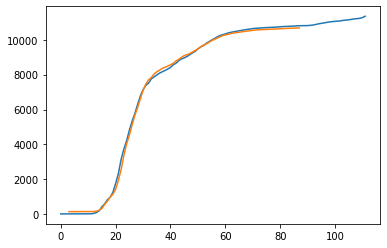

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()